PRACTICAL LECTURE 5



Convolutions Neural Networks

1. Import the librariries and set the parameters

In [1]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
from torchvision import datasets, transforms
import matplotlib.pyplot as plt
import numpy

In [ ]:
def set_default(figsize=(10, 10), dpi=100):
    plt.style.use(['dark_background', 'bmh'])
    plt.rc('axes', facecolor='k')
    plt.rc('figure', facecolor='k')
    plt.rc('figure', figsize=figsize, dpi=dpi)


def plot_data(X, y, d=0, auto=False, zoom=1):
    X = X.cpu()
    y = y.cpu()
    plt.scatter(X.numpy()[:, 0], X.numpy()[:, 1], c=y, s=20, cmap=plt.cm.Spectral)
    plt.axis('square')
    plt.axis(np.array((-1.1, 1.1, -1.1, 1.1)) * zoom)
    if auto is True: plt.axis('equal')
    plt.axis('off')

    _m, _c = 0, '.15'
    plt.axvline(0, ymin=_m, color=_c, lw=1, zorder=0)
    plt.axhline(0, xmin=_m, color=_c, lw=1, zorder=0)


def plot_model(X, y, model):
    model.cpu()
    mesh = np.arange(-1.1, 1.1, 0.01)
    xx, yy = np.meshgrid(mesh, mesh)
    with torch.no_grad():
        data = torch.from_numpy(np.vstack((xx.reshape(-1), yy.reshape(-1))).T).float()
        Z = model(data).detach()
    Z = np.argmax(Z, axis=1).reshape(xx.shape)
    plt.contourf(xx, yy, Z, cmap=plt.cm.Spectral, alpha=0.3)
    plot_data(X, y)


2. Load the Dataset (MNIST) using PyTorch DataLoader utilities and visualize some images :


  0%|          | 0/9912422 [00:00<?, ?it/s]

Extracting ./data/MNIST/raw/train-images-idx3-ubyte.gz to ./data/MNIST/raw



  0%|          | 0/28881 [00:00<?, ?it/s]

Extracting ./data/MNIST/raw/train-labels-idx1-ubyte.gz to ./data/MNIST/raw



  0%|          | 0/1648877 [00:00<?, ?it/s]

Extracting ./data/MNIST/raw/t10k-images-idx3-ubyte.gz to ./data/MNIST/raw



  0%|          | 0/4542 [00:00<?, ?it/s]

Extracting ./data/MNIST/raw/t10k-labels-idx1-ubyte.gz to ./data/MNIST/raw



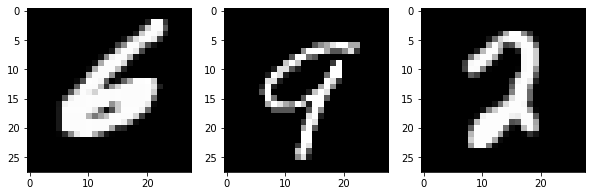

In [2]:
import torch
from torchvision import datasets, transforms
import matplotlib.pyplot as plt

# Define the transformation to apply to the data
transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize((0.5,), (0.5,))
])

batch_size = 128
num_epochs = 10


train_dataset = datasets.MNIST('./data', train=True, download=True, transform=transform)
test_dataset = datasets.MNIST('./data', train=False, download=True, transform=transform)


train_loader = torch.utils.data.DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
test_loader = torch.utils.data.DataLoader(test_dataset, batch_size=batch_size, shuffle=False)

# Get a batch of data
data_iter = iter(train_loader)
images, labels = next(data_iter)

plt.figure(figsize=(10,5))
plt.subplot(131)
plt.imshow(images[0].squeeze(), cmap='gray')
plt.subplot(132)
plt.imshow(images[1].squeeze(), cmap='gray')
plt.subplot(133)
plt.imshow(images[2].squeeze(), cmap='gray')




3. Create the model classes




In [3]:
class CNN(nn.Module):
    def __init__(self):
        super(CNN, self).__init__()
        
        # Define the layers of the network
        self.conv1 = nn.Conv2d(1, 16, kernel_size=3, padding=1)
        self.conv2 = nn.Conv2d(16, 32, kernel_size=3, padding=1)
        self.conv3 = nn.Conv2d(32, 64, kernel_size=3, padding=1)
        self.relu = nn.ReLU()
        self.pool = nn.MaxPool2d(kernel_size=2)
        self.fc1 = nn.Linear(64 * 3 * 3, 256)
        self.fc2 = nn.Linear(256, 10)
        
    def forward(self, x):
        # Apply the layers of the network in the forward pass
        x = self.conv1(x)
        x = self.relu(x)
        x = self.pool(x)
        
        x = self.conv2(x)
        x = self.relu(x)
        x = self.pool(x)
        
        x = self.conv3(x)
        x = self.relu(x)
        x = self.pool(x)
        
        x = x.view(-1, 64 * 3 * 3)
        x = self.fc1(x)
        x = self.relu(x)
        x = self.fc2(x)
        
        return x

4. Run on a GPU: device string

Switching between CPU and GPU in PyTorch is controlled via a device string, which will seemlessly determine whether GPU is available, falling back to CPU if not:

In [ ]:
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
device

device(type='cuda')

5. Train a small fully-connected network

In [ ]:
class ANN(nn.Module):
    def __init__(self):
        super(ANN, self).__init__()

        self.fc1 = nn.Linear(784, 512)
        self.fc2 = nn.Linear(512, 256)
        self.fc3 = nn.Linear(256, 10)
        self.relu = nn.ReLU()
        
    def forward(self, x):

        x = x.view(-1, 784)
        x = self.fc1(x)
        x = self.relu(x)
        x = self.fc2(x)
        x = self.relu(x)
        x = self.fc3(x)
        
        return x


model = ANN()


criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters())


for epoch in range(num_epochs):
    running_loss = 0.0
    for i, data in enumerate(train_loader, 0):
        inputs, labels = data
        optimizer.zero_grad()
        
        outputs = model(inputs)
        loss = criterion(outputs, labels)

        loss.backward()
        optimizer.step()
        

        running_loss += loss.item()

    print(f"[Epoch {epoch+1}] loss: {running_loss/100:.3f}")


print("\n===== DONE ====== ")

[Epoch 1] loss: 1.553
[Epoch 2] loss: 0.658
[Epoch 3] loss: 0.474
[Epoch 4] loss: 0.372
[Epoch 5] loss: 0.309
[Epoch 6] loss: 0.266
[Epoch 7] loss: 0.232
[Epoch 8] loss: 0.211
[Epoch 9] loss: 0.188
[Epoch 10] loss: 0.169

===== DONE ====== 


In [ ]:
correct = 0
total = 0
with torch.no_grad():
    for data in test_loader:
        # Get the inputs and labels
        inputs, labels = data
        
        # Forward pass
        outputs = model(inputs)
        _, predicted = torch.max(outputs.data, 1)
        
        # Compute the accuracy
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

print(f"Test accuracy: {correct/total*100:.2f}%")

Test accuracy: 97.67%


6. Train a ConvNet with the same number of parameters

In [ ]:
cnn = CNN()

# Define the loss function and optimizer
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(cnn.parameters())


for epoch in range(num_epochs):
    running_loss = 0.0
    for i, data in enumerate(train_loader, 0):

        inputs, labels = data
        optimizer.zero_grad()
        
        outputs = cnn(inputs)
        loss = criterion(outputs, labels)

        loss.backward()
        optimizer.step()
        
        running_loss += loss.item()

    print(f"[Epoch {epoch+1}] loss: {running_loss/100:.3f}")

print("\n===== DONE ====== ")

[Epoch 1] loss: 1.248
[Epoch 2] loss: 0.276
[Epoch 3] loss: 0.192
[Epoch 4] loss: 0.149
[Epoch 5] loss: 0.118
[Epoch 6] loss: 0.100
[Epoch 7] loss: 0.082
[Epoch 8] loss: 0.070
[Epoch 9] loss: 0.060
[Epoch 10] loss: 0.053

===== DONE ====== 


In [ ]:
correct = 0
total = 0
with torch.no_grad():
    for data in test_loader:
        inputs, labels = data
        outputs = cnn(inputs)
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

print(f"Test accuracy: {correct/total*100:.2f}%")

Test accuracy: 99.02%


7. Changes the parameters oof the model.

8. Analyze the results and the impact of these paremeters.

**Nombre de couches convolution :** cet hyperparamètre détermine la profondeur du CNN. Un réseau plus profond peut apprendre des fonctionnalités plus complexes, mais il nécessite également plus de temps de formation et de ressources de calcul.

**Taille du noyau :** la taille du noyau détermine le champ de réception du CNN. Un noyau plus grand peut capturer plus d'informations en une seule étape, mais cela peut également conduire à plus de paramètres et à un apprentissage plus lent.

**Stride :** la foulée est la quantité de déplacement du filtre lors de l'exécution de la convolution. Une foulée plus importante peut réduire la dimension spatiale des cartes d'entités en sortie, ce qui peut rendre le modèle plus efficace. Cependant, cela peut également entraîner une perte d'informations.

**Padding :** le rembourrage fait référence à la quantité de remplissage de zéro autour de l'image d'entrée. Cela peut aider à préserver la dimension spatiale des cartes d'entités en sortie, ce qui peut être utile pour préserver des informations importantes sur les bords et les limites.

**Pooling Layer :** le regroupement est une opération de sous-échantillonnage qui peut réduire la taille des cartes d'entités. Cela peut aider à réduire le surajustement et les coûts de calcul, mais cela peut également entraîner une perte d'informations.

**Taux d'apprentissage :** le taux d'apprentissage détermine la rapidité avec laquelle le modèle met à jour ses paramètres pendant l'entraînement. Un taux d'apprentissage plus élevé peut entraîner une convergence plus rapide, mais il peut également amener le modèle à dépasser la solution optimale.

**Batch Size :** la batch Size détermine le nombre d'échantillons traités à la fois pendant la formation. Une taille de lot plus importante peut entraîner une formation plus rapide, mais elle peut également nécessiter plus de mémoire et entraîner de moins bonnes performances de généralisation.

**Nombre de filtres :** cet hyperparamètre détermine le nombre de filtres dans chaque couche convolutive. Un plus grand nombre de filtres peut capturer plus de fonctionnalités, mais cela conduit également à plus de paramètres et à une complexité de calcul.